## Allstate training data

Acknowledgements: 
- https://civisanalytics.com/blog/data-science/2015/12/23/workflows-in-python-curating-features-and-thinking-scientifically-about-algorithms/
    - Excellent resource on using one-hot-encoder to create a lot of dummy variables

http://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/

In [2]:
# import xgboost
# from xgboost import XGBRegressor
from sklearn.grid_search import GridSearchCV
from numpy import loadtxt
# from xgboost import plot_importance


from IPython.display import Audio
Audio(url="assets/fire_pager.mp3",autoplay=True)

//anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
//anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [115]:
alert = Audio(url="assets/fire_pager.mp3",autoplay=True)

In [1]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.linear_model
import sklearn.cross_validation
from sklearn.linear_model import LinearRegression
import sklearn.cross_validation
from sklearn.cross_validation import cross_val_score
import numpy as np
import sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.cross_validation import train_test_split, StratifiedKFold, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.linear_model import SGDRegressor
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.grid_search import GridSearchCV
import sklearn.tree
import sklearn.ensemble
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
import pydotplus
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor



//anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
//anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [1]:
filename = 'train.csv'
n = sum(1 for line in open(filename)) - 1 
s = 30000
skip = sorted(random.sample(xrange(1,n+1),n-s)) 
df = pd.read_csv(filename, skiprows=skip)

NameError: name 'random' is not defined

In [5]:
# df = pd.read_csv('assets/train.csv')

In [3]:
df.head(2)

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,20,A,B,A,B,A,A,A,A,B,...,0.867021,0.583389,0.90267,0.84847,0.80218,0.644013,0.785706,0.859764,0.242416,3585.75
1,25,A,B,A,A,A,A,A,A,B,...,0.429383,0.877905,0.39455,0.53565,0.50556,0.550529,0.538473,0.336261,0.715009,6396.85


In [5]:
df.sample(20)

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
28415,556069,A,A,A,A,A,B,A,A,A,...,0.688705,0.490407,0.33906,0.62542,0.73106,0.622276,0.609277,0.687115,0.724623,2835.21
23316,455154,A,A,A,A,B,A,A,A,A,...,0.319522,0.366858,0.53046,0.33237,0.37493,0.266190,0.261799,0.231475,0.810896,549.14
22433,437716,B,A,A,A,B,A,A,A,A,...,0.536159,0.420873,0.36083,0.34365,0.44467,0.492200,0.481306,0.725783,0.208136,1626.14
28090,549320,A,B,A,A,A,A,A,A,B,...,0.219274,0.269765,0.64027,0.31763,0.25604,0.223038,0.250169,0.360468,0.231107,1545.71
8472,165224,A,A,A,B,A,A,A,A,A,...,0.448496,0.723522,0.36083,0.40657,0.40666,0.812519,0.800726,0.287682,0.559730,3547.41
17006,332891,A,A,A,A,A,A,A,A,A,...,0.289648,0.320920,0.56011,0.33237,0.30060,0.301022,0.295524,0.417430,0.299717,2020.07
17369,339533,A,A,A,A,A,B,A,A,A,...,0.233692,0.244789,0.70342,0.30859,0.21230,0.197173,0.194925,0.417430,0.715511,729.61
15982,312375,A,B,B,A,B,A,A,A,B,...,0.819104,0.480422,0.88205,0.93383,0.78770,0.784967,0.772574,0.784711,0.815687,10161.07
8696,169560,B,A,A,B,A,A,A,A,A,...,0.241359,0.313651,0.34445,0.34365,0.35434,0.288058,0.289207,0.327393,0.348872,649.20
289,6200,A,A,A,A,A,B,A,A,A,...,0.180791,0.301045,0.29758,0.32128,0.21230,0.209813,0.207184,0.261150,0.820494,2369.03


In [6]:
df.tail(3)

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
29997,587595,A,B,A,B,A,A,A,A,B,...,0.806951,0.555567,0.74629,0.93383,0.78770,0.757468,0.772574,0.812550,0.843080,4003.79
29998,587611,A,B,A,A,B,A,A,A,B,...,0.186254,0.317274,0.27797,0.32128,0.24355,0.180456,0.178698,0.304350,0.381660,4659.57
29999,587624,A,A,A,A,A,B,A,A,A,...,0.334270,0.382000,0.63475,0.40455,0.47779,0.307628,0.301921,0.318646,0.305872,1108.34


#### After doing some preliminary inspection the training dataset is clean and ready for more exploratory data analysis (EDA)

## Data Dictionary (Draft)
#### 116 Categorical Variables - 'cat1 - cat116'
#### 14 Continuous Variables - 'cont1 - cont14'
#### 1 Target Feature - 'loss' 

In [7]:
df.head(5)

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,20,A,B,A,B,A,A,A,A,B,...,0.867021,0.583389,0.90267,0.84847,0.80218,0.644013,0.785706,0.859764,0.242416,3585.75
1,25,A,B,A,A,A,A,A,A,B,...,0.429383,0.877905,0.39455,0.53565,0.50556,0.550529,0.538473,0.336261,0.715009,6396.85
2,51,A,A,A,A,A,B,A,A,A,...,0.688705,0.437192,0.67263,0.83505,0.59334,0.678924,0.665644,0.684242,0.407411,2658.70
3,52,A,A,B,A,A,B,A,A,A,...,0.443265,0.637086,0.36636,0.52938,0.39068,0.678924,0.665644,0.304350,0.310796,4167.32
4,93,A,A,A,A,B,A,A,A,A,...,0.557431,0.402942,0.34445,0.52728,0.79139,0.377724,0.369858,0.687115,0.297788,1753.50


In [10]:
dfCatVar = df.ix[:,1:117]

In [11]:
df.ix[:,-1:,] #this will be assigned to y

,loss
0,939.85
1,6609.32
2,3485.99
3,1510.00
4,1997.58
5,4352.30
6,2540.83
7,4723.41
8,1715.27
9,4773.39


### We'll want to make dummies with these categorical variables, but let's check the unique counts in each column to make sure there are not some columns that will "blow-up" trying to make dummies

In [12]:
columns = dfCatVar.columns

uniqueValues = []
for col in columns:
    uniqueValues.append(len(dfCatVar[col].unique()))

In [13]:
numbersInt = map(int, uniqueValues) # convert string list to integer list

print "Size:",    len(numbersInt)
print "Min:",     min(numbersInt)
print "Max:",     max(numbersInt)
print "Average:", float(sum(numbersInt))/len(numbersInt) if len(numbersInt) > 0 else float('nan')

Size: 116
Min: 2
Max: 208
Average: 7.72413793103


#### So we have a categorical variable column with 326 "unique" values if we have very many of those our DataFrame could get very "WIDE" with dummy variables.

In [14]:
testCat = dfCatVar

In [15]:
testCat.head(2)

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116
0,B,B,A,B,A,A,A,A,B,A,...,K,K,BI,CS,C,N,AE,A,O,DJ
1,A,B,B,A,A,A,A,A,B,B,...,F,B,BI,CL,A,AE,A,A,J,DJ


In [16]:
testCat2 = testCat.apply(pd.Series.nunique)

In [17]:
testCat2.describe()

count    116.000000
mean       7.724138
std       22.071263
min        2.000000
25%        2.000000
50%        2.000000
75%        4.000000
max      208.000000
dtype: float64

In [18]:
len(testCat2[testCat2 > 5])

22

In [19]:
testCat2[testCat2 > 5]

cat91       8
cat92       6
cat94       7
cat96       8
cat97       7
cat99      16
cat100     15
cat101     14
cat103     10
cat104     17
cat105     16
cat106     16
cat107     17
cat108     11
cat109     53
cat110     91
cat111     12
cat112     50
cat113     50
cat114     15
cat115     18
cat116    208
dtype: int64

In [20]:
testCat2[testCat2 > 50]

cat109     53
cat110     91
cat116    208
dtype: int64

#### Decided to not drop the large categorical columns - we'll make dummies for all the categorical variables.

In [21]:
# cat109     84
# cat110    131
# cat112     51
# cat113     61
# cat116    326

#removing these columns b/c of the number of categorical variables in them
#concerned that it will "blow-up" the width of the dataset

#Decided to not drop the big categorical columns.

# testCat.drop( 'cat109', axis=1, inplace=True )
# testCat.drop( 'cat110', axis=1, inplace=True )
# testCat.drop( 'cat112', axis=1, inplace=True )
# testCat.drop( 'cat113', axis=1, inplace=True )
# testCat.drop( 'cat116', axis=1, inplace=True )

# names_of_columns_to_transform.remove('cat109')
# names_of_columns_to_transform.remove('cat110')
# names_of_columns_to_transform.remove('cat112')
# names_of_columns_to_transform.remove('cat113')
# names_of_columns_to_transform.remove('cat116')


In [22]:
print(testCat.columns.values)

['cat1' 'cat2' 'cat3' 'cat4' 'cat5' 'cat6' 'cat7' 'cat8' 'cat9' 'cat10'
 'cat11' 'cat12' 'cat13' 'cat14' 'cat15' 'cat16' 'cat17' 'cat18' 'cat19'
 'cat20' 'cat21' 'cat22' 'cat23' 'cat24' 'cat25' 'cat26' 'cat27' 'cat28'
 'cat29' 'cat30' 'cat31' 'cat32' 'cat33' 'cat34' 'cat35' 'cat36' 'cat37'
 'cat38' 'cat39' 'cat40' 'cat41' 'cat42' 'cat43' 'cat44' 'cat45' 'cat46'
 'cat47' 'cat48' 'cat49' 'cat50' 'cat51' 'cat52' 'cat53' 'cat54' 'cat55'
 'cat56' 'cat57' 'cat58' 'cat59' 'cat60' 'cat61' 'cat62' 'cat63' 'cat64'
 'cat65' 'cat66' 'cat67' 'cat68' 'cat69' 'cat70' 'cat71' 'cat72' 'cat73'
 'cat74' 'cat75' 'cat76' 'cat77' 'cat78' 'cat79' 'cat80' 'cat81' 'cat82'
 'cat83' 'cat84' 'cat85' 'cat86' 'cat87' 'cat88' 'cat89' 'cat90' 'cat91'
 'cat92' 'cat93' 'cat94' 'cat95' 'cat96' 'cat97' 'cat98' 'cat99' 'cat100'
 'cat101' 'cat102' 'cat103' 'cat104' 'cat105' 'cat106' 'cat107' 'cat108'
 'cat109' 'cat110' 'cat111' 'cat112' 'cat113' 'cat114' 'cat115' 'cat116']


In [23]:
names_of_columns_to_transform = ['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 
                                 'cat6', 'cat7', 'cat8', 'cat9', 'cat10',
                                 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 
                                 'cat16', 'cat17', 'cat18', 'cat19','cat20', 
                                 'cat21', 'cat22', 'cat23', 'cat24', 'cat25', 
                                 'cat26', 'cat27', 'cat28', 'cat29', 'cat30', 
                                 'cat31', 'cat32', 'cat33', 'cat34', 'cat35', 
                                 'cat36', 'cat37', 'cat38', 'cat39', 'cat40', 
                                 'cat41', 'cat42', 'cat43', 'cat44', 'cat45', 
                                 'cat46', 'cat47', 'cat48', 'cat49', 'cat50', 
                                 'cat51', 'cat52', 'cat53', 'cat54', 'cat55', 
                                 'cat56', 'cat57', 'cat58', 'cat59', 'cat60', 
                                 'cat61', 'cat62', 'cat63', 'cat64', 'cat65',
                                 'cat66', 'cat67', 'cat68', 'cat69', 'cat70', 
                                 'cat71', 'cat72', 'cat73', 'cat74', 'cat75', 
                                 'cat76', 'cat77', 'cat78', 'cat79', 'cat80', 
                                 'cat81', 'cat82', 'cat83', 'cat84', 'cat85', 
                                 'cat86', 'cat87', 'cat88', 'cat89', 'cat90', 
                                 'cat91', 'cat92', 'cat93', 'cat94', 'cat95', 
                                 'cat96', 'cat97', 'cat98', 'cat99', 'cat100', 
                                 'cat101', 'cat102', 'cat103', 'cat104', 'cat105', 
                                 'cat106', 'cat107', 'cat108', 'cat109','cat110',
                                 'cat111', 'cat112', 'cat113', 'cat114', 'cat115',
                                'cat116']

In [24]:
def hot_encoder(df, column_name):
    column = df[column_name].tolist()
    column = np.reshape( column, (len(column), 1) )
    enc = sklearn.preprocessing.OneHotEncoder()
    enc.fit( column )
    new_column = enc.transform( column ).toarray()
    column_titles = []
    ### making titles for the new columns, and appending them to the dataframe
    for ii in range( len(new_column[0]) ):
        this_column_name = column_name+"_"+str(ii)
        df[this_column_name] = new_column[:,ii]
    return df

### Unable to get this function to work because categorical variables are strings. Need to get some help to learn how to incorporate LabelEncoder into this to accomodate categorical variables with strings!

In [25]:
# for feature in names_of_columns_to_transform:
#     testCat3 = hot_encoder(testCat, feature)

# print( testCat.head() )

In [26]:
testCat.head(2)

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116
0,B,B,A,B,A,A,A,A,B,A,...,K,K,BI,CS,C,N,AE,A,O,DJ
1,A,B,B,A,A,A,A,A,B,B,...,F,B,BI,CL,A,AE,A,A,J,DJ


### Was able to successfully accomplish with this code.
source: http://stackoverflow.com/questions/37292872/how-can-i-one-hot-encode-in-python

In [27]:
def dummyEncode(df):
        names_of_columns_to_transform = list(df.select_dtypes(include=['category','object']))
        le = LabelEncoder()
        for feature in names_of_columns_to_transform:
            try:
                df[feature] = le.fit_transform(df[feature])
            except:
                print('Error encoding '+feature)
        return df

### Now the data frame is integer categorical variables

In [29]:
dummyEncode(testCat)

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116
0,1,1,0,1,0,0,0,0,1,0,...,9,10,21,45,1,38,2,0,11,44
1,0,1,1,0,0,0,0,0,1,1,...,4,1,21,38,0,5,0,0,6,44
2,0,0,0,0,0,1,0,0,0,0,...,8,10,21,27,0,43,19,5,11,49
3,0,1,0,1,1,0,0,0,1,1,...,7,6,21,69,1,18,49,0,11,168
4,0,0,0,0,1,0,0,0,0,0,...,7,5,21,62,0,8,44,0,10,128
5,0,1,0,0,0,0,0,0,1,0,...,5,1,21,87,0,34,32,0,7,44
6,0,1,0,0,1,0,0,1,1,1,...,5,1,2,72,0,18,26,0,8,37
7,0,0,0,1,1,1,0,0,0,0,...,7,6,21,49,1,27,19,7,11,115
8,0,0,0,0,0,1,0,0,0,0,...,8,4,21,3,0,8,38,7,11,103
9,0,1,1,0,0,0,0,0,1,0,...,4,1,21,41,0,11,19,0,7,119


In [30]:
for feature in names_of_columns_to_transform:
    testCat3 = hot_encoder(testCat, feature)

testCat3.head() 

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cat116_198,cat116_199,cat116_200,cat116_201,cat116_202,cat116_203,cat116_204,cat116_205,cat116_206,cat116_207
0,1,1,0,1,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1,1,0,0,0,0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1,0,1,1,0,0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
trainCat = testCat3 #called test bc I was trying it out should be called 
#train bc it is the training data!

In [32]:
trainCatCont = pd.merge(trainCat, df.ix[:,117:-1], right_index=True, left_index=True)

In [33]:
trainCatCont.head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,1,1,0,1,0,0,0,0,1,0,...,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642
1,0,1,1,0,0,0,0,0,1,1,...,0.525831,0.411902,0.593548,0.31796,0.38846,0.48889,0.457203,0.447145,0.301535,0.205651
2,0,0,0,0,0,1,0,0,0,0,...,0.281143,0.381515,0.403892,0.72299,0.37458,0.40666,0.341813,0.335036,0.611431,0.674034
3,0,1,0,1,1,0,0,0,1,1,...,0.465115,0.817706,0.449126,0.90055,0.84847,0.80218,0.550529,0.561143,0.814573,0.725934
4,0,0,0,0,1,0,0,0,0,0,...,0.388783,0.601533,0.618825,0.32317,0.64873,0.71775,0.377724,0.369858,0.684242,0.256475


In [147]:
trainCatCont.cont10.describe()

count    10000.000000
mean         0.501214
std          0.187498
min          0.000000
25%          0.364580
50%          0.472250
75%          0.630260
max          0.994630
Name: cont10, dtype: float64

### The continuous variables have already been normalized so no additional transformation required. Now we have a data frame with all categorical variables as dummies and continuous normalized.

In [34]:
X = trainCatCont

In [35]:
X.shape

(10000, 1026)

In [42]:
y = df['loss'].apply(np.log)

In [43]:
y.shape

(10000,)

Just a couple last steps to get everything ready for sklearn. The features and labels are taken out of their dataframes and put into a numpy.ndarray and list, respectively.

X = features_df.as_matrix()
y = labels_df["status_group"].tolist()

source: https://civisanalytics.com/blog/data-science/2015/12/17/workflows-in-python-getting-data-ready-to-build-models/

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [56]:
#cv = KFold()

In [78]:
def evaluate_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    scores = cross_val_score(model, X_test, y_test, cv=3)
    
    return mae
    

all_models = {}

In [61]:

# num_folds = 10
# num_instances = len(X)
# seed = 7
# kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
# model = LinearRegression()
# scoring = 'mean_absolute_error'
# results = cross_validation.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
# print("MAE: %.3f (%.3f)") % (results.mean(), results.std())

#### Linear Regression

In [99]:
lr = LinearRegression()
all_models['lr'] = {'model': lr,
                    'score': evaluate_model(lr)}

-3.61916308226e+16


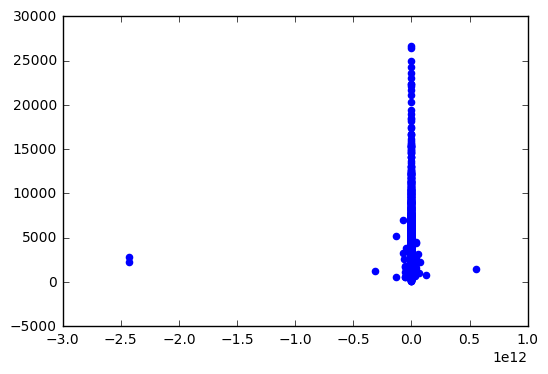

In [102]:
plt.scatter(lr.predict(X_test), y_test, color='b')

### Decision Tree Regressor

In [64]:
#cv = KFold(len(y_test), shuffle=True)
dt = DecisionTreeRegressor()

In [65]:
all_models['dt'] = {'model': dt,
                    'score': evaluate_model(dt)}

-0.07


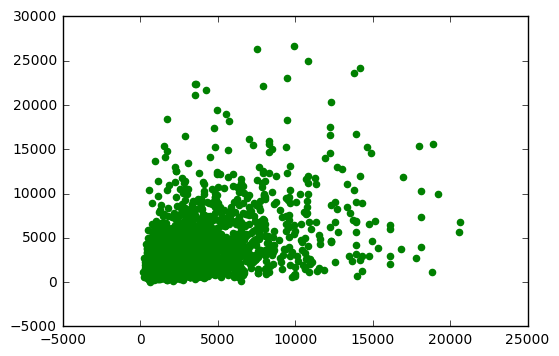

In [103]:
plt.scatter(dt.predict(X_test), y_test, color='g')

### Random Forest Regressor

In [66]:
rf = RandomForestRegressor()

In [67]:
all_models['rf'] = {'model': rf,
                    'score': evaluate_model(rf)}

0.45


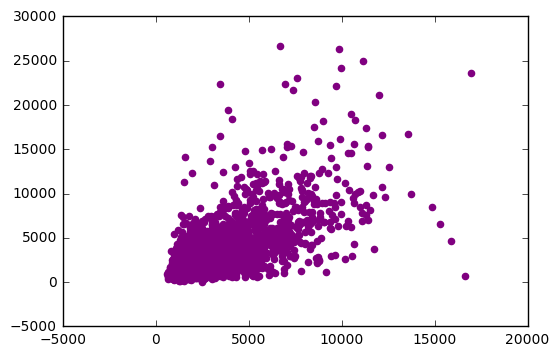

In [105]:
plt.scatter(rf.predict(X_test), y_test, color='purple')

### AdaBoost Regressor

In [68]:
ab = AdaBoostRegressor()

In [69]:
all_models['ab'] = {'model': ab,
                    'score': evaluate_model(ab)}

-0.13


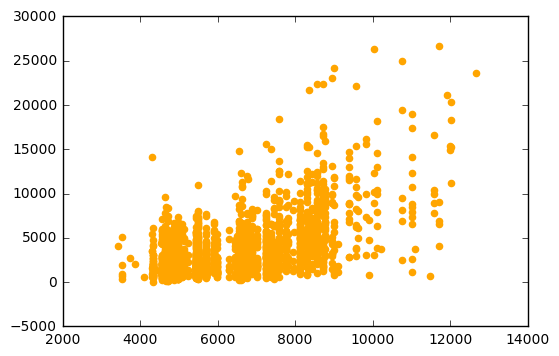

In [106]:
plt.scatter(ab.predict(X_test), y_test, color='orange')

### Gradient Boosting Trees Regressor

In [70]:
gb = GradientBoostingRegressor()

In [71]:
all_models['gb'] = {'model': gb,
                    'score': evaluate_model(gb)}

0.48


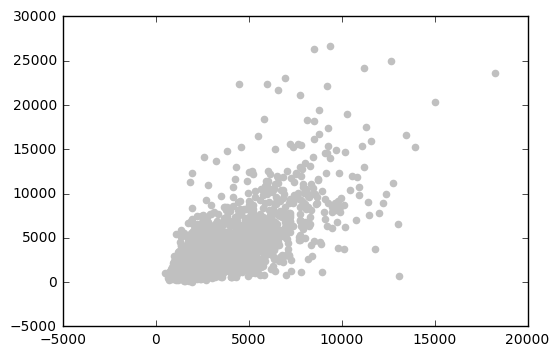

In [107]:
plt.scatter(gb.predict(X_test), y_test, color='silver')

### XGBoost (Extreme Gradient Boosting)

In [8]:
# fit model no training data
xgb = xgboost.XGBRegressor()

NameError: name 'xgboost' is not defined

In [73]:
all_models['xgb'] = {'model': xgb,
                    'score': evaluate_model(xgb)}

0.49


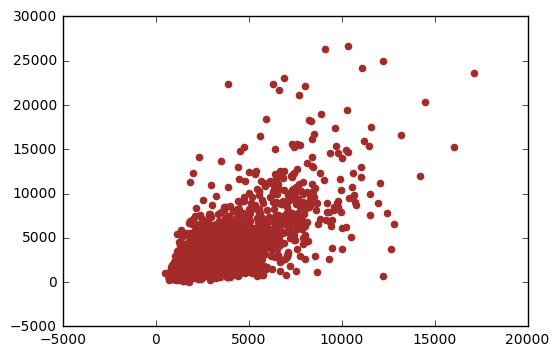

In [109]:
plt.scatter(xgb.predict(X_test), y_test, color='brown')

In [120]:
scoresdf = pd.DataFrame.from_dict(all_models, orient='index')
scoresdf.sort_values('score', ascending=True, inplace=True)

In [121]:
scoresdf

,model,score
gsxgb,"GridSearchCV(cv=None, error_score='raise',\n ...",1.265918e+03
lr,"LinearRegression(copy_X=True, fit_intercept=Tr...",2.417537e+09


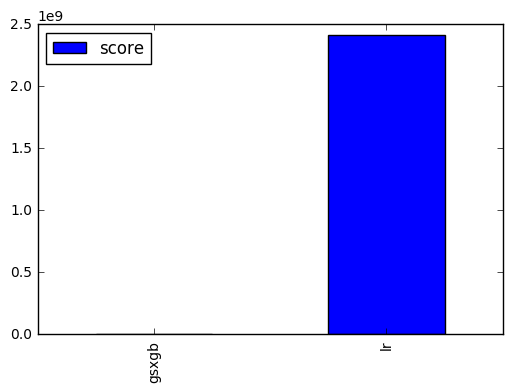

In [126]:
scoresdf.plot(kind='bar', sort_columns=True)

In [81]:
xgboost_tbl = {} #Empty Dictionary to append XGBoosting GridSearch 
# Parameters to track and document iterations

### GridSearch for XGBoost

##### Grid Search for XGBoosting (Parameters)

In [ ]:
# XGBoost Parameters for Hypertuning:
# gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, 
# colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, seed=0, missing

In [129]:
params = {'max_depth': [4],
         'learning_rate': [0.0875],
         'min_child_weight': [55],
         'colsample_bytree': [.66],
         'subsample' : [.875]}

In [130]:
gsxgb = GridSearchCV(xgboost.XGBRegressor(), params)

In [131]:
all_models['gsxgb'] = {'model': gsxgb,
                    'score': evaluate_model(gsxgb)}

alert

0.48


In [134]:
%%timeit
xgboost_tbl ['gsxgb'] = {'model': gsxgb,
                    'score': evaluate_model(gsxgb),
                        'params': gsxgb.best_params_,
                        'best_estimator': gsxgb.best_estimator_}

alert

0.48
0.48
0.48
0.48
1 loop, best of 3: 1min 47s per loop


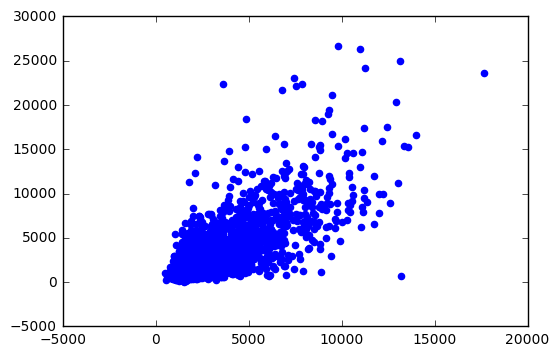

In [133]:
plt.scatter(gsxgb.predict(X_test), y_test, color='blue')

### Grid Searched XGBoost 1.0

In [137]:
param1 = {'max_depth': [4],
         'learning_rate': [0.0875],
         'min_child_weight': [55],
         'colsample_bytree': [.66],
         'subsample' : [.875]}

In [140]:
xgb1 = xgboost.XGBRegressor(max_depth=4, learning_rate=.0875, 
                            min_child_weight=55, colsample_bytree=.66,
                           subsample=.875)


In [141]:
eval_set = [(X_test, y_test)]
xgb1.fit(X_train, y_train, eval_metric="error", eval_set=eval_set, verbose=True)

alert

[0]	validation_0-error:-3070.25
[1]	validation_0-error:-3070.25
[2]	validation_0-error:-3070.25
[3]	validation_0-error:-3070.25
[4]	validation_0-error:-3070.25
[5]	validation_0-error:-3070.25
[6]	validation_0-error:-3070.25
[7]	validation_0-error:-3070.25
[8]	validation_0-error:-3070.25
[9]	validation_0-error:-3070.25
[10]	validation_0-error:-3070.25
[11]	validation_0-error:-3070.25
[12]	validation_0-error:-3070.25
[13]	validation_0-error:-3070.25
[14]	validation_0-error:-3070.25
[15]	validation_0-error:-3070.25
[16]	validation_0-error:-3070.25
[17]	validation_0-error:-3070.25
[18]	validation_0-error:-3070.25
[19]	validation_0-error:-3070.25
[20]	validation_0-error:-3070.25
[21]	validation_0-error:-3070.25
[22]	validation_0-error:-3070.25
[23]	validation_0-error:-3070.25
[24]	validation_0-error:-3070.25
[25]	validation_0-error:-3070.25
[26]	validation_0-error:-3070.25
[27]	validation_0-error:-3070.25
[28]	validation_0-error:-3070.25
[29]	validation_0-error:-3070.25
[30]	validation_0-er

In [142]:
xgb1.feature_importances_

array([ 0.00670391,  0.00558659,  0.        , ...,  0.02458101,
        0.00670391,  0.04692737], dtype=float32)

NameError: name 'figsize' is not defined

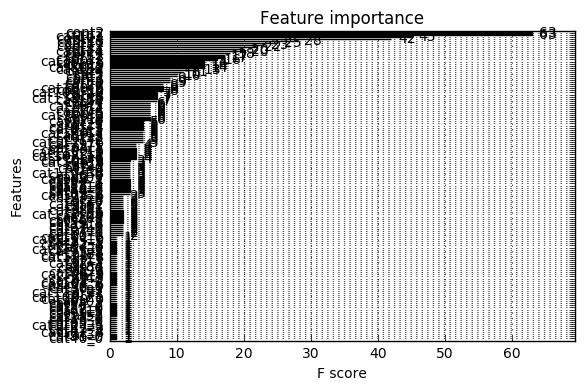

In [148]:
plot_importance(xgb1)
plt.show()

In [132]:
print(gsxgb.feature_importances_)

AttributeError: 'GridSearchCV' object has no attribute 'feature_importances_'

#### Create a dataframe to document XGBoosting iterations

In [122]:
xgboost_tbl_df = pd.DataFrame.from_dict(xgboost_tbl, orient='index')
xgboost_tbl_df.sort_values('score', ascending=True, inplace=True)

In [123]:
xgboost_tbl_df

,model,score,params
gsxgb,"GridSearchCV(cv=None, error_score='raise',\n ...",1265.918272,"{u'subsample': 0.875, u'learning_rate': 0.0875..."
